Let consider that the polymer will behave as a random walk inside the capsule. Then only the entropic term will contribute to the free energy.

In order to properly determine a free energy we need to compute the entropy of configuration. We will account for an excluded volume interaction (self-avoidance) in a "mean-field" way. After pulling inside the capsule $k$ monomer the fraction $k\frac{v}{V}$ won't be aviable anymore.

There for after pulling $k+1$ monomers the number of possibilities will be  $(q-1)(1 - k\frac{v}{V})$ (with q=6 in 3D)

The total number $\mathcal{N}$ of walks will be :

$\begin{aligned} \mathcal{N} &=q(q-1)^{N}\left(1-\frac{v}{V}\right)\left(1-2 \frac{v}{V}\right) \cdots\left[1-(N-1) \frac{v}{V}\right]=\\ &=q(q-1)^{N} \prod_{k=1}^{N-1}\left(1-k \frac{v}{V}\right)=\\ &=q(q-1)^{N} \chi \end{aligned}$

$\begin{aligned} \chi &=\prod_{i=1}^{N-1}\left(1-k \frac{v}{V}\right)=\left(\frac{v}{V}\right)^{N-1} \prod_{k=1}^{N-1}\left(\frac{V}{v}-k\right)=\\ &=\left(\frac{v}{V}\right)^{N} \prod_{k=0}^{N-1}\left(\frac{V}{v}-k\right)=\left(\frac{v}{V}\right)^{N} \frac{\left(\frac{V}{v}\right) !}{\left(\frac{V}{v}-N\right) !} \end{aligned}$

using stirling we find $\ln \chi = -N+\left(\frac{V}{v}-N\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-N\right)\right]$

For a FJC in 3D the distribution of end to end displacement: 

$$p_N(R) = \left(\frac{3}{2\pi N}\right)^{3/2} \frac{4\pi R^2}{l^3} \exp{\left(-\frac{3 R^2}{2 N l^2}\right)}$$

$l$ is the kuhn length

The expression for the free energy is then :

$$ F(R) = -k_B T \log{n(R)} = - K_B T \left ( \ln q + N\ln (q-1) -N+\left(\frac{V}{v}-N\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-N\right)\right] -\frac{3}{2} \ln \frac{2\pi N}{3} +\ln \frac{4\pi R^2}{l^3} -\frac{3 R^2}{2Nl^2} \right) $$


Now we can compute the pressure, by considering the variation with respect to the volume occupied by the polymer ($Nv$)

$$-p = \frac{1}{v}\frac{\partial F}{\partial N} = \frac{K_B T}{v} \left [  \ln(q-1) -\ln\frac{V}{v} + \ln \left(\frac{V}{v}-N\right) - \frac{3}{2N} + \frac{3 R^2}{2(Nl)^2}\right] $$

$$\Rightarrow f =   -\frac{K_B T}{4\pi R^2 v}\left [ \ln(q-1) -\ln\frac{V}{v} + \ln \left(\frac{V}{v}-N\right) - \frac{3}{2N} + \frac{3 R^2}{2(Nl)^2}  \right] $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
x = np.array([30.37292789969,31.99187600139,33.6108241031,
              35.22977220481,36.84872030651,38.46766840822,
              40.65324834552,42.27219644723,43.89114454894,
              45.51009265064,47.12904075235,48.74798885406,50.36693695576,
              51.98588505747,53.60483315918,55.22378126088,
              56.84272936259,58.4616774643,60.080625566,
              61.69957366771,63.31852176942,64.93746987113,
              66.55641797283,68.17536607454,69.79431417625,
              71.41326227795,73.03221037966,74.65115848137,
              76.27010658307,77.88905468478,79.50800278649,
              81.12695088819,82.7458989899,84.36484709161,
              85.98379519331,87.60274329502,89.22169139673,
              90.84063949843,92.45958760014,94.07853570185,
              95.69748380355,97.31643190526,98.93538000697,
              100.5543281087,102.1732762104,103.7922243121])


y = np.array([-0.5429885000496,-0.6086670962625,-0.1817562208784,
              0.01527956776048,0.01527956776048,-0.08323832655894,
              -0.08323832655894,0.1137974620799,0.4093511450382,
              1.033297809061,1.263172895806,1.460208684445,
              1.624405174978,1.952798156042,2.576744820065,
              3.200691484088,3.726120253792,4.842656389412,
              6.057710419352,7.502639536036,8.750532864082,
              9.867068999703,11.27915881828,13.15099881035,
              16.00801774561,18.17541142064,19.94873351839,
              21.49218052939,22.70723455933,24.11932437791,
              25.89264647566,28.15855804501,30.6543447011,
              33.47852433826,36.99232923565,39.84934817091,
              42.11525974026,43.92142113612,45.46486814712,
              46.81127936949,47.92781550511,48.88015515019,
              49.79965549717,50.52212005552,51.34310250818,
              51.9670491722])

In [35]:
R = 20            # capside radius (nm)
N = 19000         # number of baise-pairs
pi = np.pi
V = 1.3*pi*(R**3) # volume of the capside
S = 4*pi*(R**2)   # surface of the capside
K = 4.114/298     # K_B (pN nm)
l = 50            #kuhn length (nm)

def model(x,q,v,T) :
    n = (N*x/100)/150 # we have divide by persistance length    
    f = -S*T*(K/(v)) * (np.log(q-1) -np.log(V/v) +np.log(V/v -n) - 3/(2*n) + (6*R**2)/(n*l)**2)
    return f

As the DNA have a persistence length of the order of the capsid radius, it has no room to move freely. There for a lots of turns will happend close to boundary and less than 6 direction will be aviable.

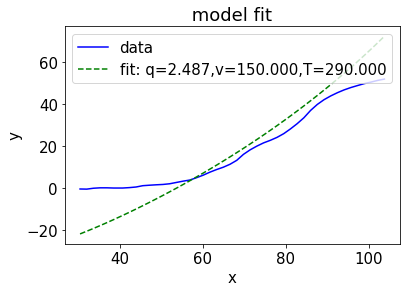

In [39]:
plt.figure(1)
plt.rc('font', size=15)

popt, pcov = curve_fit(model, x,y,maxfev=10000,p0=[3,151,295],bounds=([1.001,150,290],[6,V/131.5,300]))

plt.plot(x, y, 'b-', label='data')
plt.plot(x, model(x, *popt), 'g--',
         label='fit: q=%5.3f,v=%5.3f,T=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' model fit ')
plt.legend()
plt.show()